C:\Users\user\AppData\Local\Temp\ipykernel_15468\2545938989.py:9: DtypeWarning: Columns (4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_encoded = pd.read_csv('./encoded_data.csv')
C:\Users\user\AppData\Local\Temp\ipykernel_15468\2545938989.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(cols1, rotation=45, ha='right')
C:\Users\user\AppData\Local\Temp\ipykernel_15468\2545938989.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cols2, rotation=45, ha='right')


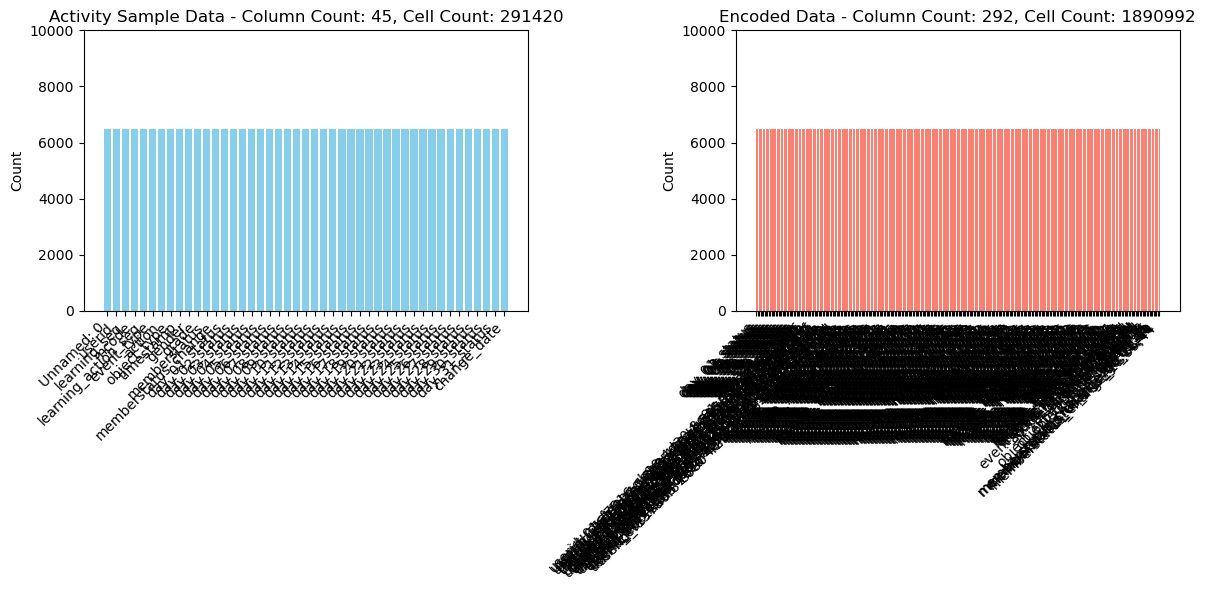

ValueError: could not convert string to float: '01cf7916-eb98-4d30-8c81-dd52aa5be060'

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
df_activity = pd.read_csv('./activity_sample.csv')
df_encoded = pd.read_csv('./encoded_data.csv')

# 데이터 시각화를 위한 함수 정의
def visualize_data(df1, df2, title1, title2):
    # 데이터프레임의 열 수 및 셀 수
    cols1 = df1.columns # cols1 = df1[1:12].columns
    cols2 = df2.columns
    
    col_count1 = len(cols1)
    col_count2 = len(cols2)
    
    cell_count1 = df1.size
    cell_count2 = df2.size
    
    # 시각화
    fig, ax = plt.subplots(1, 2, figsize=(12, 6)) # figsize=(60, 30))
    #fig, ax = plt.subplots(1, figsize=(12, 6))
    
    # 첫 번째 데이터프레임
    ax[0].bar(cols1, df1.count(), color='skyblue')
    ax[0].set_title(f'{title1} - Column Count: {col_count1}, Cell Count: {cell_count1}')
    ax[0].set_ylabel('Count')
    ax[0].set_xticklabels(cols1, rotation=45, ha='right')
    ax[0].set_ylim(0, 10000)
    
    # 두 번째 데이터프레임
    ax[1].bar(cols2, df_encoded.count(), color='salmon')
    ax[1].set_title(f'{title2} - Column Count: {col_count2}, Cell Count: {cell_count2}')
    ax[1].set_ylabel('Count')
    ax[1].set_xticklabels(cols2, rotation=45, ha='right')
    ax[1].set_ylim(0, 10000)
    
    #plt.yticks(range(0, 20000, 3000))
    plt.tight_layout()
    plt.show()

# 데이터 시각화
visualize_data(df_activity, df_encoded, 'Activity Sample Data', 'Encoded Data')

# 데이터 전처리
# change_date 열을 제외한 나머지 열 선택
X = df_activity.drop(columns=['change_date', 'Unnamed: 0', 'memberstatus', 'grade', 'timestamp', 'learning_seq', 'learning_action_seq'])
y = df_activity['change_date'].values  # 예측값

# 결측값 처리 (예: 평균값으로 대체)
X.replace('-', np.nan, inplace=True)
X = X.astype(np.float32)
X.fillna(X.mean(), inplace=True)

y = y.astype(np.float32)

# NaN 값이 있는지 확인
if np.any(np.isnan(X)) or np.any(np.isnan(y)):
    print("결측값이 존재합니다.")
else:
    print("결측값이 없습니다.")

# train/test 데이터셋 나누기 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# train 데이터셋의 일부를 다시 train(sub)/val 데이터셋으로 나누기 (80% sub(train), 20% val)
X_sub, X_val, y_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_sub = scaler.transform(X_sub)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# df_oh 생성 (원-핫 인코딩)
df_oh = pd.get_dummies(df_activity, drop_first=True)

# df_oh에 대한 시각화
visualize_data(df_oh, df_encoded, 'One-Hot Encoded Data', 'Encoded Data')
